In [9]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [10]:
path = "../data/pore-detection/Parallelprobe_Porenerkennung_Training/ML_input"

file_raw = "Parallelprobe_Grauwerte.h5" 
file_bin = "Parallelprobe_Binaer.h5" 

In [13]:
data = {}

with h5py.File(os.path.join(path,file_raw), "r") as file:
    
    # List all the groups in the HDF5 file
    print("Groups:")
    for group in file:
        print(group)

    data["raw"] = np.array(file['data']).astype(np.uint16)
    
    
with h5py.File(os.path.join(path,file_bin), "r") as file:
    
    # List all the groups in the HDF5 file
    print("Groups:")
    for group in file:
        print(group)

    data["labels"] = np.array(file['data'][:]).astype(np.uint8)


Groups:
data
Groups:
data


In [14]:
for key,item in data.items():
    print(key)
    print(item.dtype)
    print(item.shape)
    print(item.max(),item.min())

raw
uint16
(763, 211, 886)
14431 0
labels
uint8
(763, 211, 886)
1 0


In [17]:
mask1 = data["labels"][np.newaxis, :, :, :]
mask2 = np.bitwise_xor(data["labels"],1)[np.newaxis, :, :, :]

data["masks"] = np.concatenate((mask2, mask1), axis=0).astype(bool)


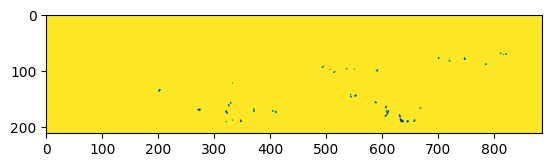

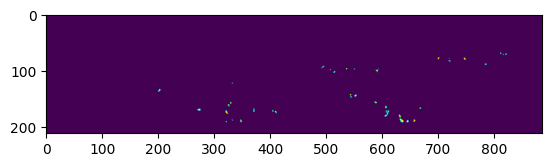

In [18]:
plt.imshow(data["masks"][0,3,::])
plt.show()
plt.imshow(data["masks"][1,3,::])
plt.show()

In [6]:
plt.imshow(data["raw"][3,:,:])

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [19]:

with h5py.File(os.path.join(path,"Parallelprobe_train.h5"), 'w') as f:
    for key,item in data.items():
        f.create_dataset(key, data = item)

In [2]:
path = "../data/pore-detection/"

file_raw = "pinnprobe_valid.h5" 
# file_bin = "Parallelprobe_Binaer.h5" 

In [4]:
data = {}

with h5py.File(os.path.join(path,file_raw), "r") as file:
    
    # List all the groups in the HDF5 file
    print("Groups:")
    for group in file:
        data[group] = file[group][:]

Groups:


In [6]:
data["labels"] = data["labels"].astype(np.uint8)

In [7]:
for key,item in data.items():
    print(key)
    print(item.dtype)
    print(item.shape)
    print(item.max(),item.min())

labels
uint8
(833, 207, 802)
1 0
masks
bool
(2, 833, 207, 802)
True False
raw
uint16
(833, 207, 802)
29564 0


In [8]:
with h5py.File(os.path.join(path,"pinnprobe_valid.h5"), 'w') as f:
    for key,item in data.items():
        f.create_dataset(key, data = item)